In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-data/iot_new2.csv


In [169]:
data=pd.read_csv("/kaggle/input/xyz-ne3/iot4.csv")

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   current          11926 non-null  float64
 1   voltage          11925 non-null  float64
 2   percentage       11925 non-null  object 
 3   soc              11926 non-null  float64
 4   temp_new         21000 non-null  float64
 5   discharge rate   11926 non-null  float64
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       6 non-null      float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [171]:
df=pd.DataFrame(data)


In [141]:
o=data.dtypes=="object"
obj_cols = list(o[o].index)


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   current          21165 non-null  float64
 1   voltage          21163 non-null  object 
 2   percentage       21162 non-null  object 
 3   soc              9215 non-null   object 
 4   temp             790 non-null    float64
 5   discharge rate   11926 non-null  float64
dtypes: float64(3), object(3)
memory usage: 992.3+ KB


In [172]:
obj = df.select_dtypes(include='object').columns
for column in obj:
    try:
        df[column] = df[column].astype(float)
    except ValueError:
        print(f"Warning: Could not convert column '{column}' to float. It contains non-numeric values.")
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [173]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   current          11926 non-null  float64
 1   voltage          11925 non-null  float64
 2   percentage       11924 non-null  float64
 3   soc              11926 non-null  float64
 4   temp_new         21000 non-null  float64
 5   discharge rate   11926 non-null  float64
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       6 non-null      float64
dtypes: float64(8)
memory usage: 1.3 MB


In [69]:
corr=df.corr()

In [174]:
print(df.isnull().sum())

current             9074
voltage             9075
percentage          9076
soc                 9074
temp_new               0
discharge rate      9074
Unnamed: 6         21000
Unnamed: 7         20994
dtype: int64


In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
df['soc'].fillna(df['soc'].mean(), inplace=True)
df['voltage'].fillna(df['voltage'].mean(), inplace=True)



In [177]:
df['percentage'].fillna(df['percentage'].mean(), inplace=True)


In [180]:
df['current'].fillna(df['current'].mean(), inplace=True)


In [181]:
print(df.isna().sum())

current                0
voltage                0
percentage             0
soc                    0
temp_new               0
discharge rate      9074
Unnamed: 6         21000
Unnamed: 7         20994
dtype: int64


In [184]:
df['temp_new'].fillna(df['temp_new'].mean(), inplace=True) 


In [186]:

df.rename(columns = {'discharge rate ':'dr'}, inplace = True)


In [187]:
df['dr'].fillna(df['dr'].mean(), inplace=True) 


In [188]:
print(df.columns)


Index(['current', 'voltage', 'percentage', 'soc', 'temp_new', 'dr',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')


In [189]:
print(df.isnull().sum())


current           0
voltage           0
percentage        0
soc               0
temp_new          0
dr                0
Unnamed: 6    21000
Unnamed: 7    20994
dtype: int64


In [193]:

df= df.drop(columns=['Unnamed: 7']) 


In [194]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   current     21000 non-null  float64
 1   voltage     21000 non-null  float64
 2   percentage  21000 non-null  float64
 3   soc         21000 non-null  float64
 4   temp_new    21000 non-null  float64
 5   dr          21000 non-null  float64
dtypes: float64(6)
memory usage: 984.5 KB


In [195]:
corr = df.corr()
print(corr)


             current   voltage  percentage       soc  temp_new        dr
current     1.000000  0.273612    0.273892 -0.629488 -0.005928  1.000000
voltage     0.273612  1.000000    0.999035  0.546720  0.008998  0.273612
percentage  0.273892  0.999035    1.000000  0.546192  0.008983  0.273892
soc        -0.629488  0.546720    0.546192  1.000000  0.011504 -0.629488
temp_new   -0.005928  0.008998    0.008983  0.011504  1.000000 -0.005928
dr          1.000000  0.273612    0.273892 -0.629488 -0.005928  1.000000


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

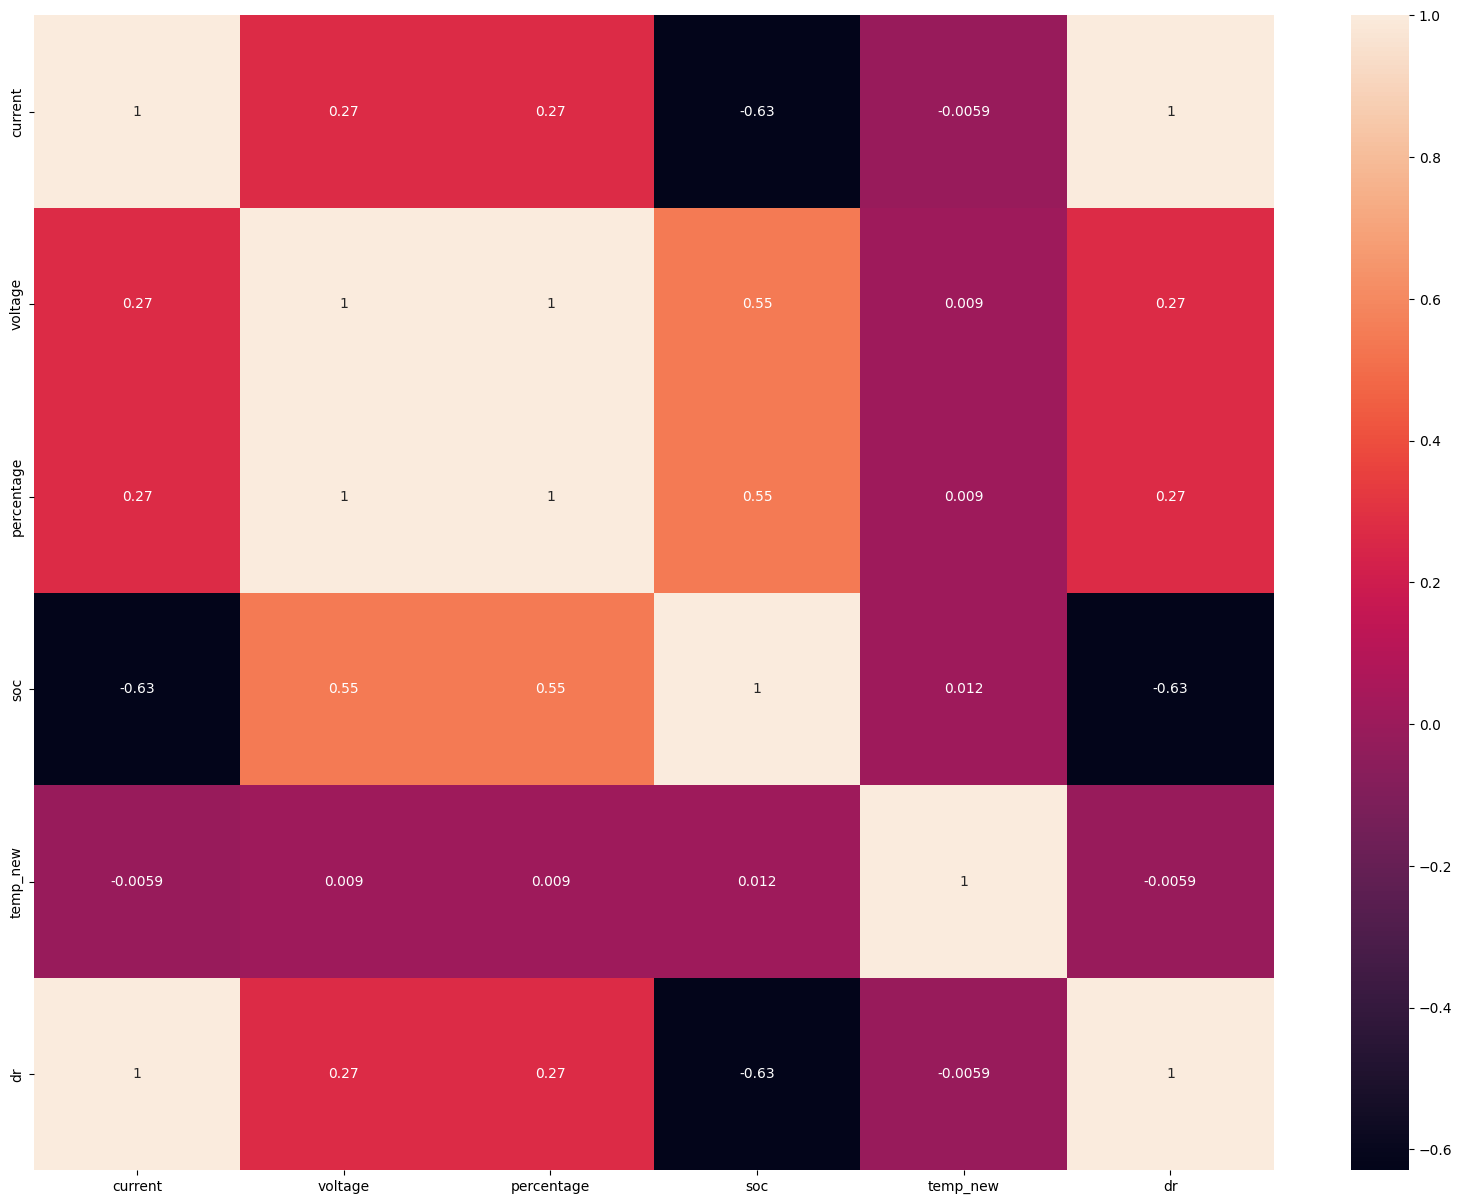

In [196]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
X = df.drop('soc', axis=1)  
y = df['soc']              
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

In [199]:
r2 = r2_score(y_test, y_pred)   

In [200]:
r2


0.9999878393032497